Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=7. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=12. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=20. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=25. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=34. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=39. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=49. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=54. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=65. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s


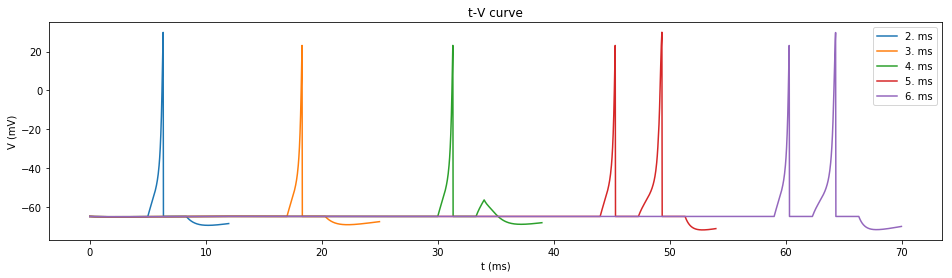

In [37]:
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

Cm=1*uF/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + I)/Cm : volt (unless refractory)
I : amp/meter**2  # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+40*mV) / (1-(exp((-(v+40*mV)) / (10*mV))))/ms : Hz
betam = 4 * exp((-v-(65*mV))/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-(65*mV))/(20*mV))/ms : Hz
betah = 1/((exp((-v-35*mV) / (10*mV))) + 1)/ms : Hz
alphan = (0.01/mV) * (v+55*mV) / (1-(exp((-v-55*mV) / (10*mV))))/ms : Hz
betan = 0.125*exp((-v-(65*mV))/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = NeuronGroup(5, eqs,
                    threshold='v > 30*mV', reset = 'v=-65*mV', refractory = 2*ms,
                    method='euler', dt = 0.025*ms)

neuron.v = -65*mV
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.I = 0
neuron.gNa = gNa0
M = StateMonitor(neuron, variables=True, record=True)

density = [0.224,0.224,0.224,0.224,0.224]
duration = [2,3,4,5,6]
figure(figsize=(16, 4))

for i in range(len(density)):

    run(5*ms, report='text')
    neuron.I[i] = density[i]*amp/meter**2  # current injection at one end 1,0; 5,0; 10,0 e 20,0.
    run(duration[i]*ms)
    neuron.I = 0*amp/metre**2
    run(5*ms, report='text')

    plot(M.t/ms, M.v[i]/mV, label=duration[i]*ms)
    xlabel('t (ms)')
    ylabel('V (mV)')
    plt.legend(loc=1)
    title('t-V curve')
    
show()



Starting simulation at t=0. s for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=9. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=14. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=25. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=30. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=43. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=48. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=63. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=68. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s
Starting simulation at t=85. ms for a duration of 5. ms
5. ms (100%) simulated in < 1s


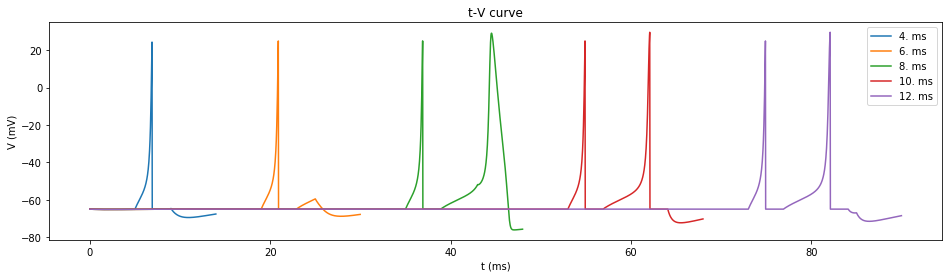

In [39]:
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

Cm=1*uF/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + I)/Cm : volt (unless refractory)
I : amp/meter**2  # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+40*mV) / (1-(exp((-(v+40*mV)) / (10*mV))))/ms : Hz
betam = 4 * exp((-v-(65*mV))/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-(65*mV))/(20*mV))/ms : Hz
betah = 1/((exp((-v-35*mV) / (10*mV))) + 1)/ms : Hz
alphan = (0.01/mV) * (v+55*mV) / (1-(exp((-v-55*mV) / (10*mV))))/ms : Hz
betan = 0.125*exp((-v-(65*mV))/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = NeuronGroup(5, eqs,
                    threshold='v > 30*mV', reset = 'v=-65*mV', refractory = 2*ms,
                    method='euler', dt = 0.025*ms)

neuron.v = -65*mV
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.I = 0
neuron.gNa = gNa0
M = StateMonitor(neuron, variables=True, record=True)

density = [0.112,0.112,0.112,0.112,0.112]
duration = [4,6,8,10,12]
figure(figsize=(16, 4))

for i in range(len(density)):

    run(5*ms, report='text')
    neuron.I[i] = density[i]*amp/meter**2  # current injection at one end 1,0; 5,0; 10,0 e 20,0.
    run(duration[i]*ms)
    neuron.I = 0*amp/metre**2
    run(5*ms, report='text')

    plot(M.t/ms, M.v[i]/mV, label=duration[i]*ms)
    xlabel('t (ms)')
    ylabel('V (mV)')
    plt.legend(loc=1)
    title('t-V curve')
    
show()